In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

### Loading the dataset

In [2]:
df = pd.read_excel('heart_disease.xlsx',sheet_name='Heart_disease')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [36]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,True,NaN,downsloping,fixed defect,4


### Data Cleaning

In [4]:
df['exang'].replace('FALSE',False,inplace=True)
df['exang'].replace('TURE',True,inplace=True)

### Dividing the features into categorical and numerical columns

In [8]:
numerical_columns = [column for column in df.columns if df[column].dtype != 'O']

In [9]:
numerical_columns

['age', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'num']

In [10]:
categorical_columns = [column for column in df.columns if column not in numerical_columns]

In [11]:
categorical_columns

['sex', 'cp', 'restecg', 'slope', 'thal']

### Checking for nan values

In [13]:
df[numerical_columns].isna().sum()

age          0
trestbps     0
chol         0
fbs          0
thalch       0
exang        0
oldpeak     62
num          0
dtype: int64

- only the oldpeak feature have nan values
---

In [53]:
df[df['oldpeak'].isna()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
9,53,Male,non-anginal,155,175,True,st-t abnormality,160,False,NaN,upsloping,fixed defect,0
371,55,Male,atypical angina,110,214,True,st-t abnormality,180,False,NaN,flat,normal,0
380,69,Male,non-anginal,175,271,False,lv hypertrophy,82,False,NaN,upsloping,reversable defect,0
381,51,Male,asymptomatic,133,218,True,lv hypertrophy,156,True,NaN,upsloping,reversable defect,0
382,58,Male,asymptomatic,131,385,True,lv hypertrophy,126,True,NaN,flat,reversable defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,69,Male,asymptomatic,154,289,True,st-t abnormality,128,True,NaN,flat,fixed defect,3
878,64,Male,asymptomatic,134,306,True,st-t abnormality,73,True,NaN,upsloping,reversable defect,3
879,60,Male,non-anginal,186,316,True,st-t abnormality,70,True,NaN,flat,fixed defect,3
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,True,NaN,downsloping,fixed defect,4


In [54]:
df[df['oldpeak'].isna()]['sex'].value_counts()

sex
Male      61
Female     1
Name: count, dtype: int64

In [55]:
df[df['oldpeak'].isna()]['exang'].value_counts()

exang
True     40
False    22
Name: count, dtype: int64

### Handling the nan values of oldpeak

In [24]:
df['oldpeak'].median()

np.float64(0.5)

In [48]:
df.groupby(['exang','sex'])['oldpeak'].median()

exang  sex   
False  Female    0.0
       Male      0.0
True   Female    1.0
       Male      1.5
Name: oldpeak, dtype: float64

- we will be using Exang and sex feature to impute the null values of oldpeak

#### Distribution of oldpeak

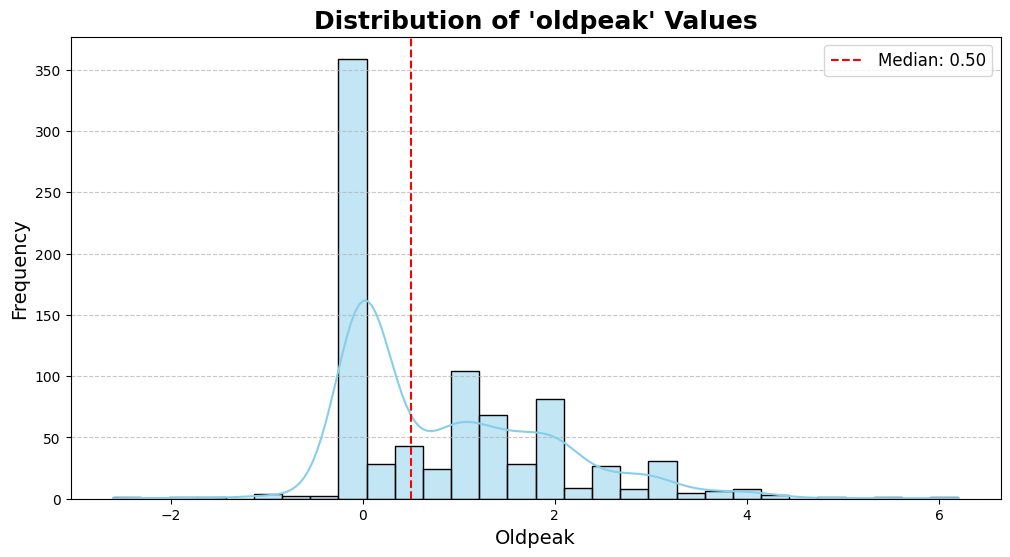

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(df['oldpeak'], kde=True, bins=30, color="skyblue", edgecolor="black")
plt.axvline(df['oldpeak'].median(), color="red", linestyle="--", label=f"Median: {df['oldpeak'].median():.2f}")
plt.title("Distribution of 'oldpeak' Values", fontsize=18, fontweight="bold")
plt.xlabel("Oldpeak", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

- most of the values are less than 0
---

#### Boxplot of oldpeak vs sex

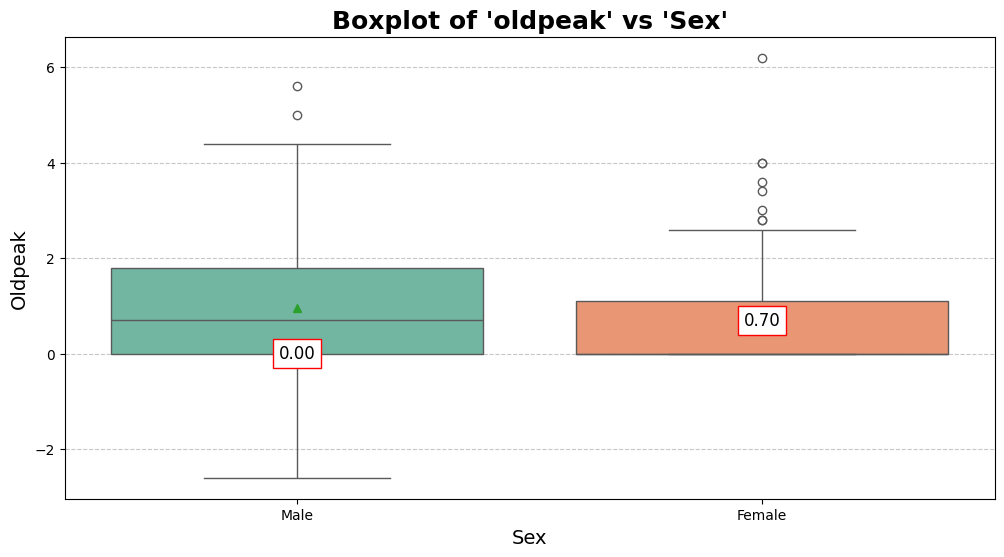

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='sex', y='oldpeak', palette="Set2", showmeans=True, 
            meanprops={"linestyle":"--", "color":"red"})
medians = df.groupby('sex')['oldpeak'].median()
for i, median in enumerate(medians):
    plt.text(i, median, f"{median:.2f}", ha='center', va='center', fontsize=12, color="black", bbox=dict(facecolor="white", edgecolor="red"))
plt.title("Boxplot of 'oldpeak' vs 'Sex'", fontsize=18, fontweight="bold")
plt.xlabel("Sex", fontsize=14)
plt.ylabel("Oldpeak", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


- oldpeak values for male is ranging from (-2,6), but for female it is ranging from (0,6)
- females have more oldpeak value
---

#### Boxplot of oldpeak vs exang

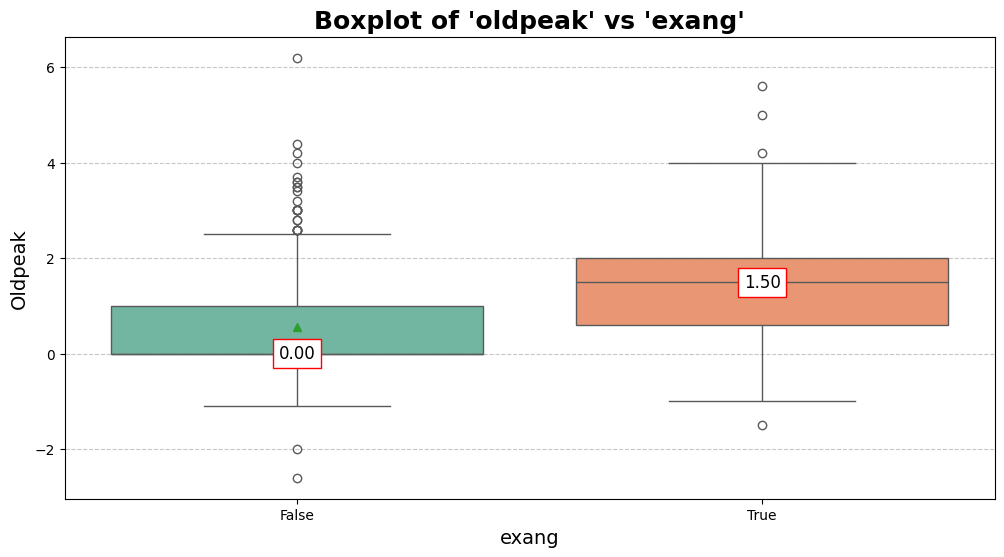

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='exang', y='oldpeak', palette="Set2", showmeans=True, 
            meanprops={"linestyle":"--", "color":"red"})
medians = df.groupby('exang')['oldpeak'].median()
for i, median in enumerate(medians):
    plt.text(i, median, f"{median:.2f}", ha='center', va='center', fontsize=12, color="black", bbox=dict(facecolor="white", edgecolor="red"))
plt.title("Boxplot of 'oldpeak' vs 'exang'", fontsize=18, fontweight="bold")
plt.xlabel("exang", fontsize=14)
plt.ylabel("Oldpeak", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

- people having exang have more oldpeak
---

#### Boxplot of oldpeak vs slope

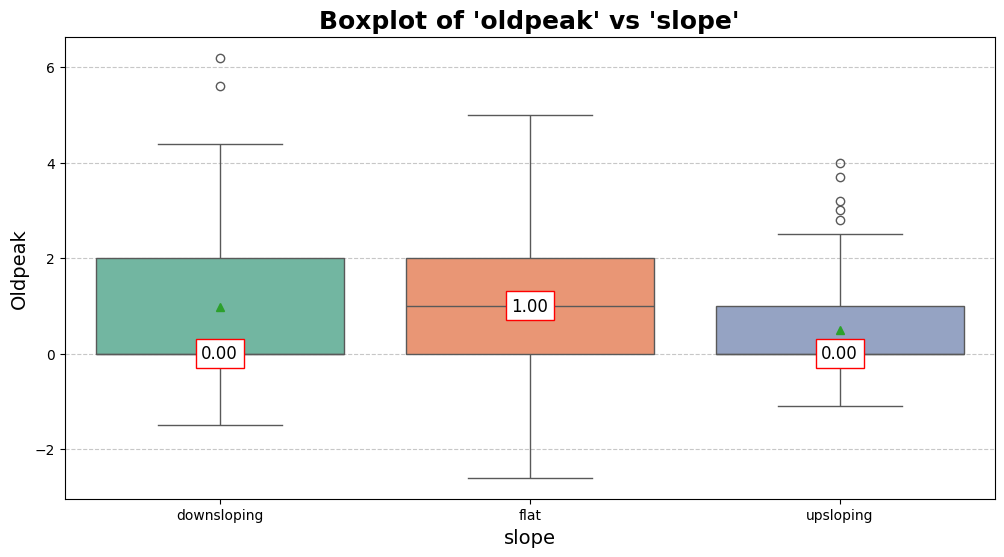

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='slope', y='oldpeak', palette="Set2", showmeans=True, 
            meanprops={"linestyle":"--", "color":"red"})
medians = df.groupby('slope')['oldpeak'].median()
for i, median in enumerate(medians):
    plt.text(i, median, f"{median:.2f}", ha='center', va='center', fontsize=12, color="black", bbox=dict(facecolor="white", edgecolor="red"))
plt.title("Boxplot of 'oldpeak' vs 'slope'", fontsize=18, fontweight="bold")
plt.xlabel("slope", fontsize=14)
plt.ylabel("Oldpeak", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

- different slope type have varying oldpeaks
---

#### Boxplot of oldpeak vs restecg

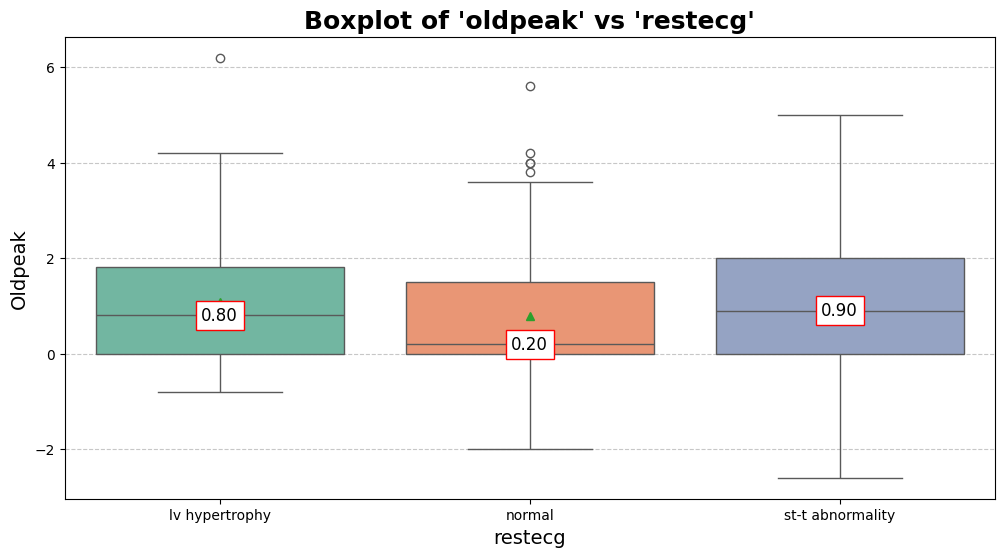

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='restecg', y='oldpeak', palette="Set2", showmeans=True, 
            meanprops={"linestyle":"--", "color":"red"})
medians = df.groupby('restecg')['oldpeak'].median()
for i, median in enumerate(medians):
    plt.text(i, median, f"{median:.2f}", ha='center', va='center', fontsize=12, color="black", bbox=dict(facecolor="white", edgecolor="red"))
plt.title("Boxplot of 'oldpeak' vs 'restecg'", fontsize=18, fontweight="bold")
plt.xlabel("restecg", fontsize=14)
plt.ylabel("Oldpeak", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

#### Boxplot of oldpeak vs cp

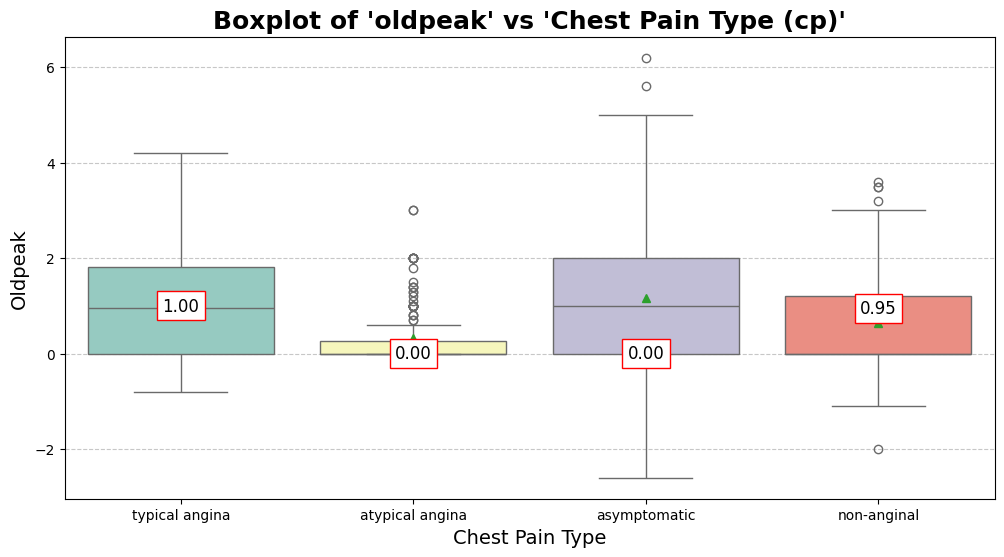

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='cp', y='oldpeak', palette="Set3", showmeans=True, 
            meanprops={"linestyle":"--", "color":"red"})
medians = df.groupby('cp')['oldpeak'].median()
for i, median in enumerate(medians):
    plt.text(i, median, f"{median:.2f}", ha='center', va='center', fontsize=12, color="black", bbox=dict(facecolor="white", edgecolor="red"))
plt.title("Boxplot of 'oldpeak' vs 'Chest Pain Type (cp)'", fontsize=18, fontweight="bold")
plt.xlabel("Chest Pain Type", fontsize=14)
plt.ylabel("Oldpeak", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

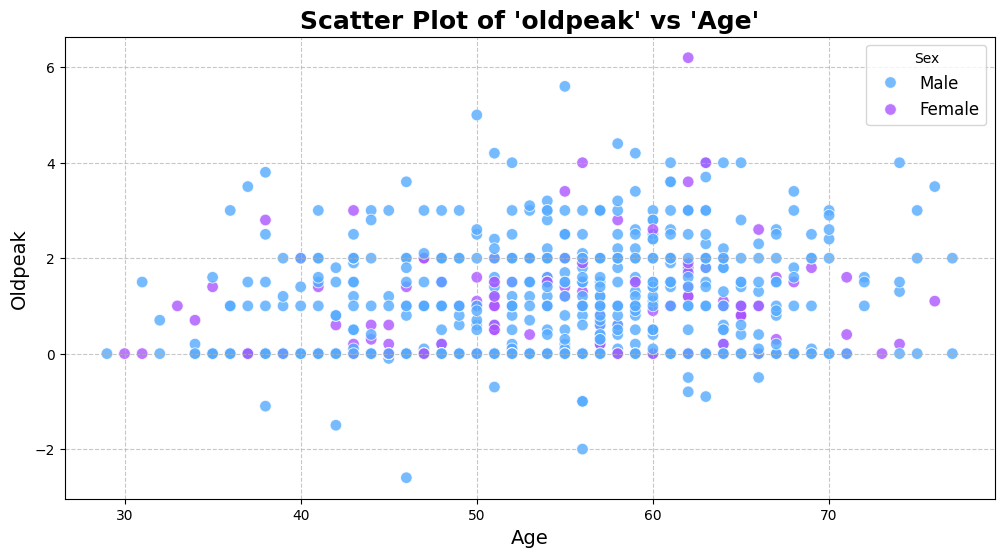

In [20]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='age', y='oldpeak', hue='sex', palette="cool", s=70, alpha=0.8)
plt.title("Scatter Plot of 'oldpeak' vs 'Age'", fontsize=18, fontweight="bold")
plt.xlabel("Age", fontsize=14)
plt.ylabel("Oldpeak", fontsize=14)
plt.legend(title="Sex", fontsize=12)
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.show()

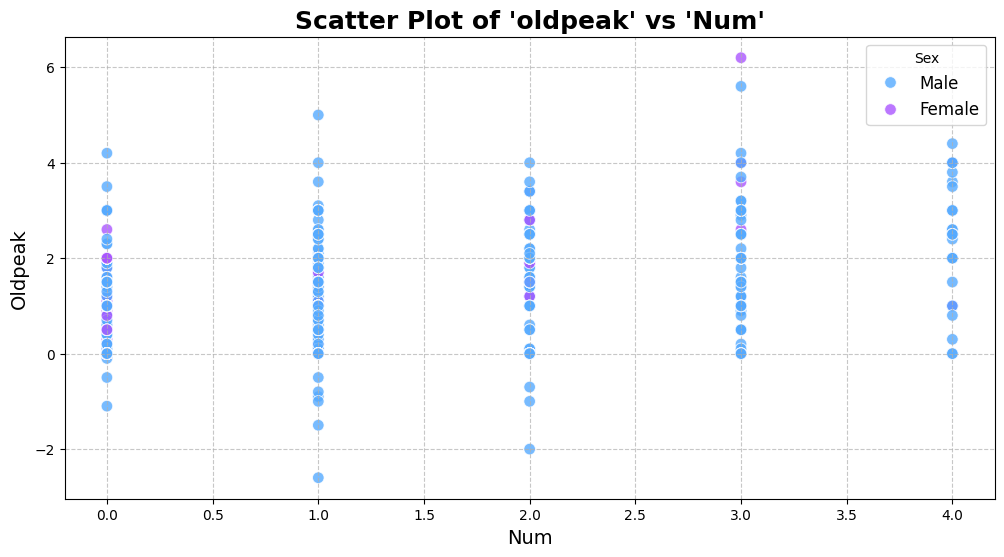

In [21]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='num', y='oldpeak', hue='sex', palette="cool", s=70, alpha=0.8)
plt.title("Scatter Plot of 'oldpeak' vs 'Num'", fontsize=18, fontweight="bold")
plt.xlabel("Num", fontsize=14)
plt.ylabel("Oldpeak", fontsize=14)
plt.legend(title="Sex", fontsize=12)
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.show()

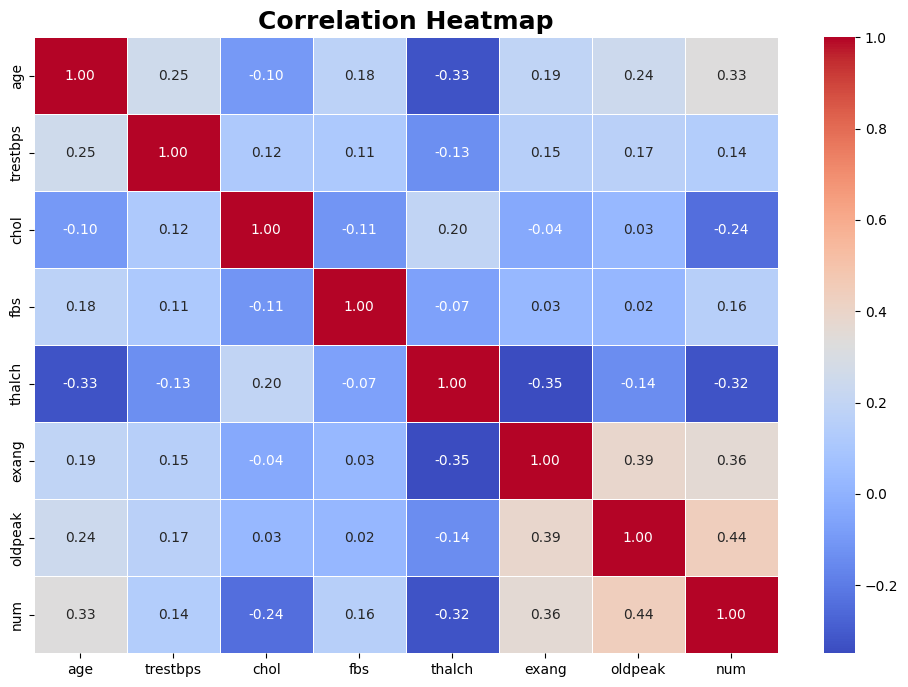

In [22]:
plt.figure(figsize=(12, 8))
corr = df[numerical_columns].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, annot_kws={"fontsize":10})
plt.title("Correlation Heatmap", fontsize=18, fontweight="bold")
plt.show()